In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
#import statsmodels.api as sm
#from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score
#import subprocess
base=''
#read in 1000 BRAINS subject list
dfs=pd.read_table(base+'Visit1_Age.txt',sep='\t')
#read in PSMD subjects list
dfm=pd.read_csv(base+'TOTAL_METRICS_Skel_header.csv',sep=' ')
#merge keeps both key columns - figure out how to avoid this
df_plot=dfm.merge(dfs,left_on='NAME', right_on='Identifiers',sort=True)
df_plot_no_visit=df_plot.drop('Visit',axis=1)
df_plot=df_plot.drop(['Identifiers', 'Visit','NAME'], axis=1)
df_plot_no_visit_no_outliers=df_plot_no_visit[df_plot_no_visit.NAME != 993754]
df_plot_no_visit_no_outliers=df_plot_no_visit_no_outliers[df_plot_no_visit_no_outliers.NAME != 995964]
df_plot_no_visit_no_outliers_no_name_no_identifiers=df_plot_no_visit_no_outliers.drop(['Identifiers', 'NAME'], axis=1)

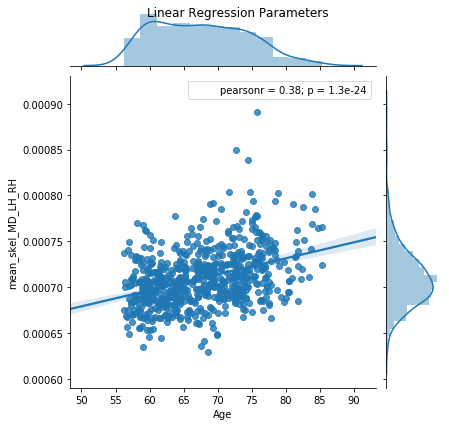

Outliers
       NAME  mean_skel_MD_LH_RH
185  992427             0.00089


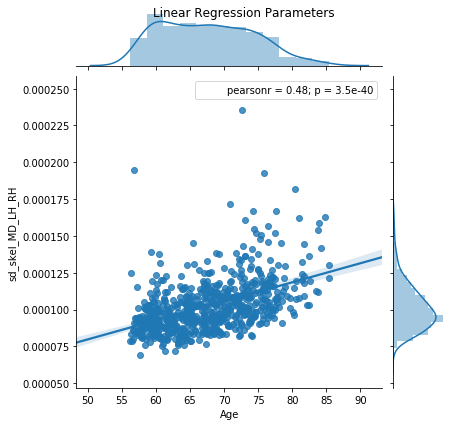

Outliers
       NAME  sd_skel_MD_LH_RH
92   991422          0.000236
100  991534          0.000195


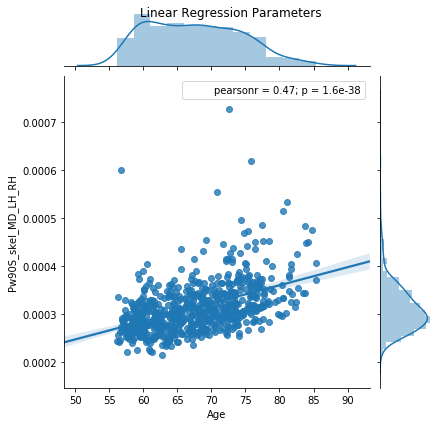

Outliers
       NAME  Pw90S_skel_MD_LH_RH
92   991422             0.000727
100  991534             0.000600
185  992427             0.000618


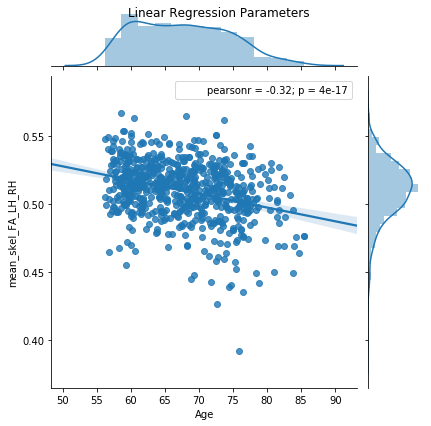

Outliers
       NAME  mean_skel_FA_LH_RH
185  992427            0.392042


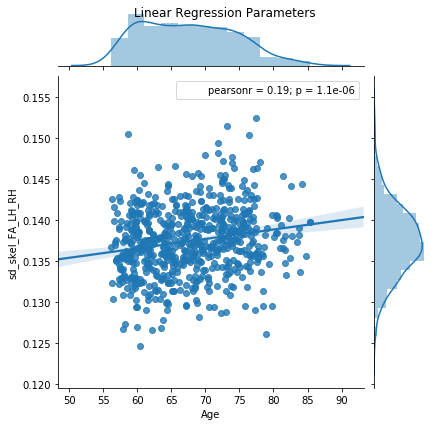

Outliers
Empty DataFrame
Columns: [NAME, sd_skel_FA_LH_RH]
Index: []


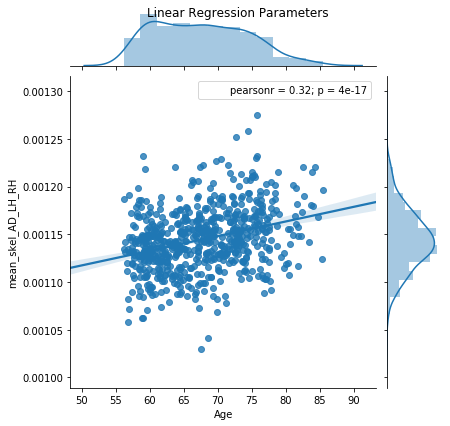

Outliers
Empty DataFrame
Columns: [NAME, mean_skel_AD_LH_RH]
Index: []


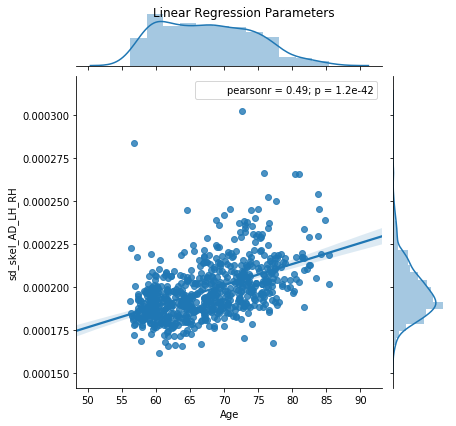

Outliers
       NAME  sd_skel_AD_LH_RH
92   991422          0.000302
100  991534          0.000284


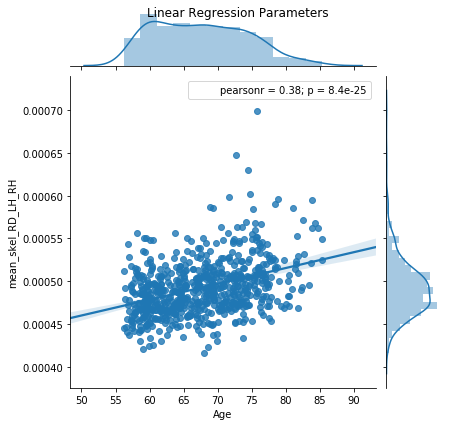

Outliers
       NAME  mean_skel_RD_LH_RH
185  992427            0.000698


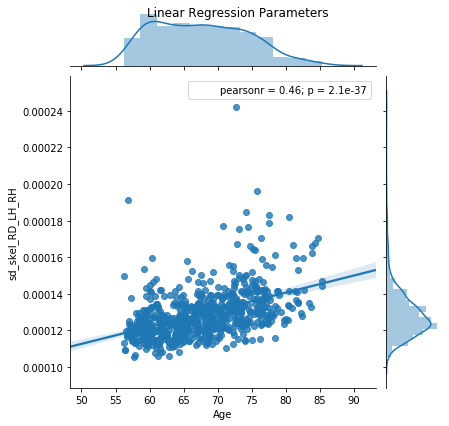

Outliers
      NAME  sd_skel_RD_LH_RH
92  991422          0.000242


In [19]:
#example linear regression parameters for the all metrics after removing outliers
for i in df_plot_no_visit.columns:
        if 'LH' in i:
            g=sns.jointplot(x='Age',y=i,data=df_plot_no_visit_no_outliers,kind='reg')
            fig = g.fig 
            fig.suptitle('Linear Regression Parameters', fontsize=12)
            plt.show()
            print "Outliers"
            print df_plot_no_visit_no_outliers[np.abs(df_plot_no_visit_no_outliers[i]-df_plot_no_visit_no_outliers[i].mean())>=(5*df_plot_no_visit_no_outliers[i].std())] [['NAME',i]]


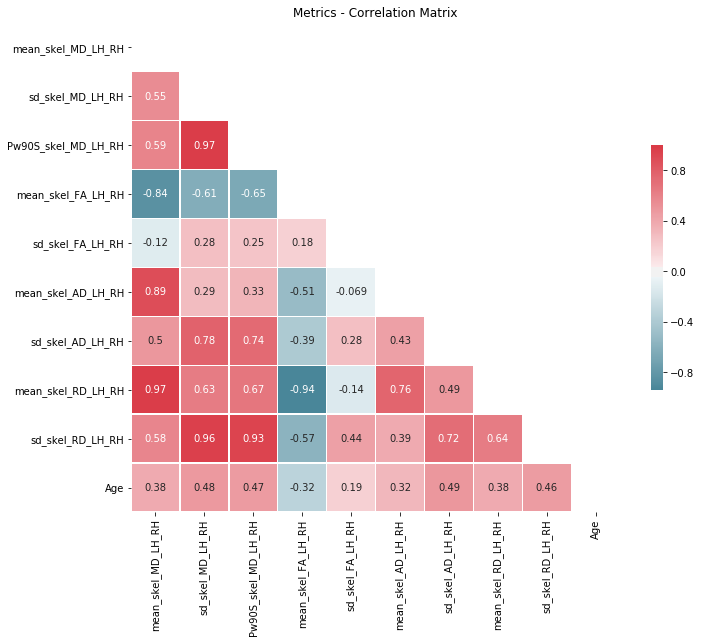

In [4]:
corr=df_plot_no_visit_no_outliers_no_name_no_identifiers.corr()
#Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
#Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
#Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap,annot=True, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}).set_title('Metrics - Correlation Matrix')
plt.show()

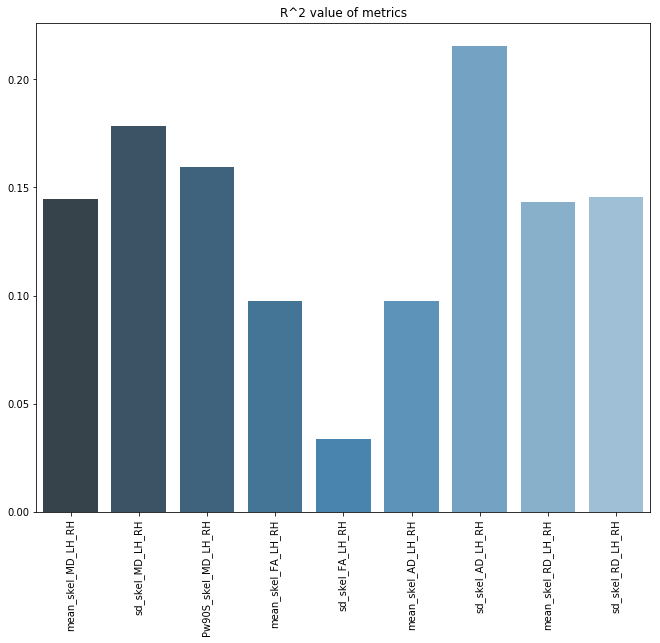

In [4]:
#function to return linreg params
def scp_linreg_metric(metric):
    x=df_plot.Age.values
    y=df_plot[metric].values
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    return slope, r_value, r_value**2, p_value

a=[]
y=np.array([])
#plot R^2 values
for i in df_plot.columns:
    if 'LH' in i:
        s,_,r2,_=scp_linreg_metric(i)
        a.append(i)
        y=np.append(y,r2)
f, ax = plt.subplots(figsize=(11, 9))
g=sns.barplot(x=a,y=y,palette="Blues_d")
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title('R^2 value of metrics')
plt.show()

['mean_skel_MD_LH_RH', 'sd_skel_MD_LH_RH', 'Pw90S_skel_MD_LH_RH', 'mean_skel_FA_LH_RH', 'sd_skel_FA_LH_RH', 'mean_skel_AD_LH_RH', 'sd_skel_AD_LH_RH', 'mean_skel_RD_LH_RH', 'sd_skel_RD_LH_RH']
<class 'pandas.core.indexes.base.Index'>
[0.05614096 0.11119409 0.08231998 0.07762585 0.09505656 0.06601989
 0.30258823 0.05770511 0.15134932]
<type 'numpy.ndarray'>


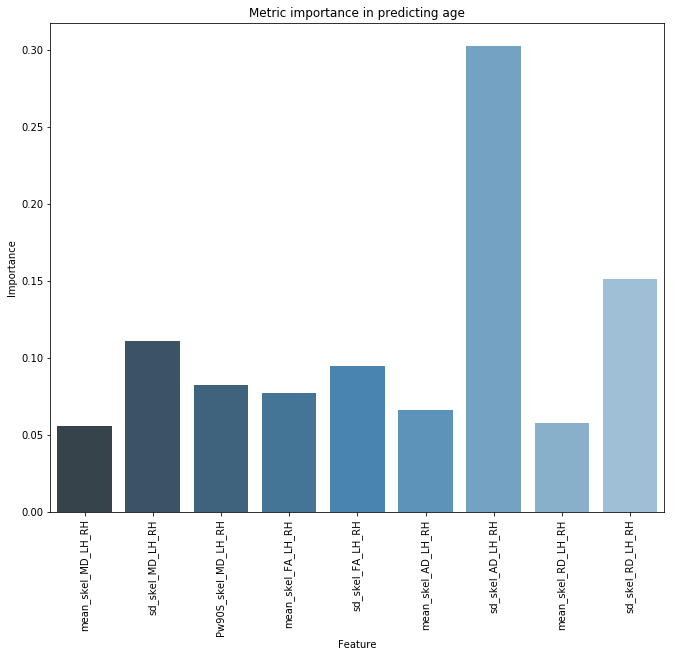

In [5]:
y=df_plot.Age
X=df_plot.drop('Age',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.33)
clf = RandomForestRegressor(n_jobs=2, n_estimators=1000)
model = clf.fit(X_train, y_train)
print X_train.columns.tolist()
print type(X_train.columns)
print model.feature_importances_
print type(model.feature_importances_)
f, ax = plt.subplots(figsize=(11, 9))
#g=sns.barplot(x=X_train.columns.tolist(),y=model.feature_importances_)
g=sns.barplot(x=X_train.columns.tolist(),y=model.feature_importances_,palette="Blues_d")
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set(xlabel='Feature', ylabel='Importance')
g.set_title('Metric importance in predicting age')
plt.show()